<a href="https://colab.research.google.com/github/anuj123-45/Customer_Segmentation/blob/master/Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
This type of data set requires customer segmentation to understand the customers beheviour.

Customer Segmentation
Customer segmentation is the process of segmenting a customer group into smaller groups in order to obtain a clear understanding of their unique needs and expectations. Customer segmentation is a method of analyzing the customer group in terms of differences and similarities within a customer group. These factors help you in offering tailor-made products or services to them and improve the retention rate of your existing customers as well.


In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# loading data
df=pd.read_csv('/content/drive/MyDrive/ecom customer_data.csv')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Data Preprocessing and EDA**

In [6]:
# give data has 30000 rows with 38 features
df.shape


(30000, 38)

In [7]:
# Statistical Summary
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


**Observation** : Average no of orders placed by customers is 4

In [8]:
#Check for null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [9]:
# count of null values in dataset
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [10]:
# Observation : As we can see only gender is containing null values

**Replace missing values in gender by performing dummy encoding**


In [11]:
dummies=pd.get_dummies(df['Gender'],dtype=int)
merged=pd.concat([dummies,df],axis=1)
data=merged
print(data.head())

   F  M  Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  ...  \
0  0  1        1      M       7       0         0        0     0     0  ...   
1  1  0        2      F       0       0         1        0     0     0  ...   
2  0  1        3      M       7       0         1        0     0     0  ...   
3  1  0        4      F       0       0         0        0     0     0  ...   
4  0  0        5    NaN      10       0         0        0     0     0  ...   

   LG  Dior  Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
0   0     0       0               0          0           0         0   
1   0     1       0               0          0           0         0   
2   0     0       0               0          0           0         0   
3   0     0       0               0          0           0         0   
4   0     0       2               0          0           0         0   

   Microsoft  Jiffy mix  Kraft  
0          0          0      0  
1          0          0   

In [12]:
# removing Gender column as it is encoded in 0 and 1
data=data.drop(['Gender'],axis=1)
data.head()

,F,M,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [13]:
# Renaming F and M columns (Female and Male)
data=data.rename(columns={'F': 'Female'})
data=data.rename(columns={'M': 'Male'})
data.head()

,Female,Male,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Exploratory Data Analysis (EDA)**

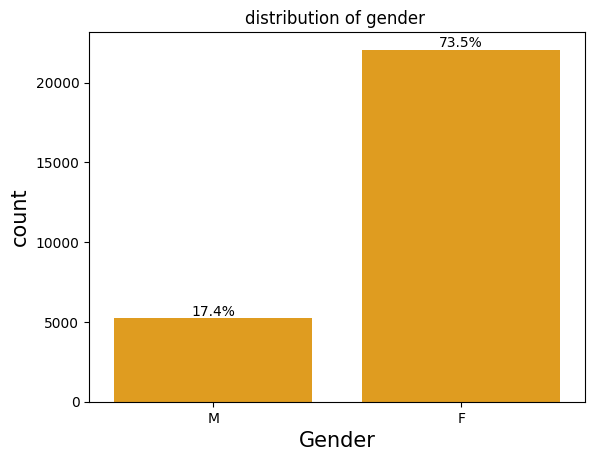

In [14]:
# Distribution of the gender of the customers
ax=sns.countplot(data=df,x='Gender',color='orange')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count/total:.1%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Observation**

Among 30000 users 73.5% are Female and 17.4% are Male

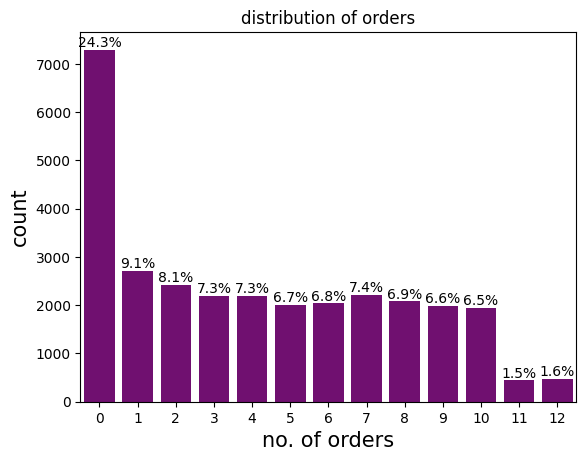

In [15]:
# Distribution of order placed by customers
ax=sns.countplot(data=df,x='Orders',color='purple')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count/total:.1%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Observation**

24.3% have done 0 orders and 1.6% have done 12 orders


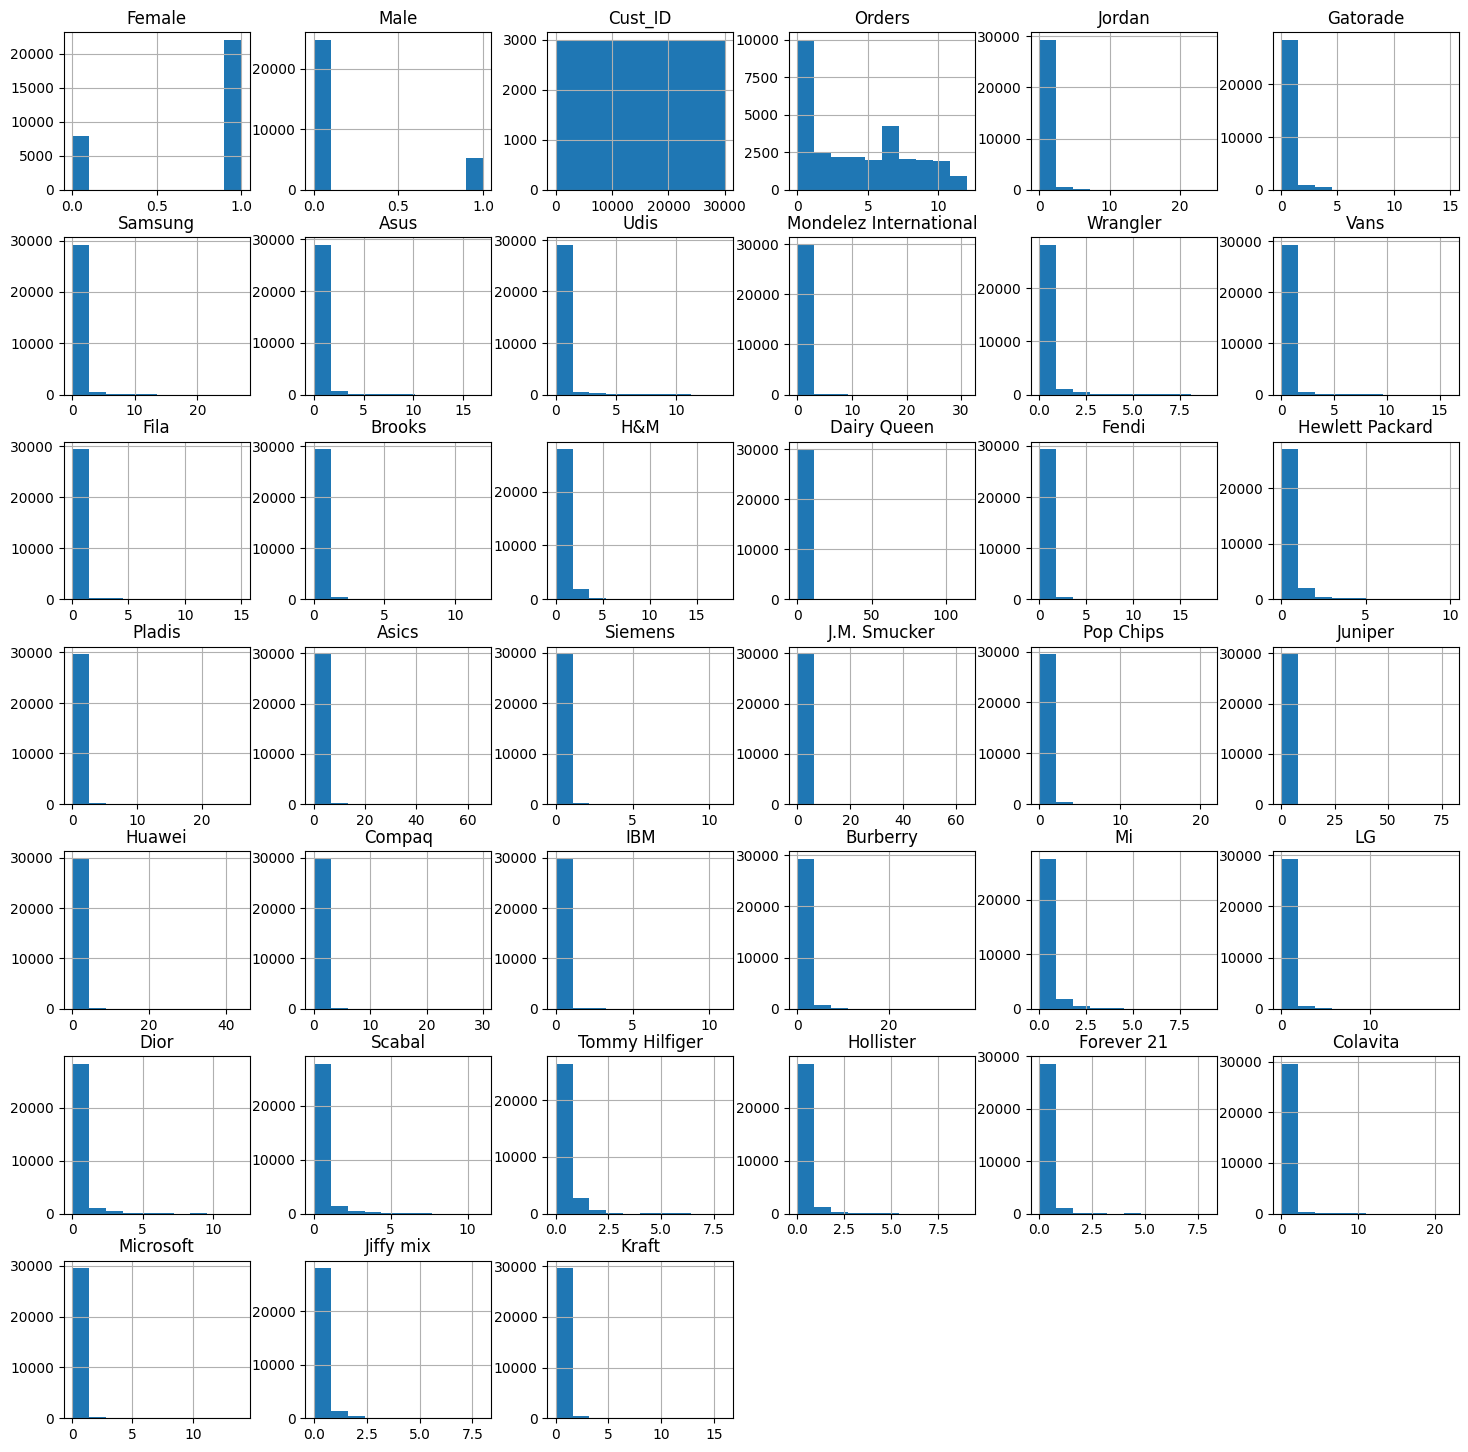

In [16]:
fig=data.hist(figsize=(18,18))



In [17]:
#Observations
counts=data.sum()
print(counts)

Female                        22054
Male                           5222
Cust_ID                   450015000
Orders                       125094
Jordan                         8023
Gatorade                       7570
Samsung                        6688
Asus                           4840
Udis                           4306
Mondelez International         4193
Wrangler                       3208
Vans                           3343
Fila                           2828
Brooks                         4204
H&M                            9846
Dairy Queen                    6280
Fendi                          4244
Hewlett Packard                4833
Pladis                         3183
Asics                          9007
Siemens                        1442
J.M. Smucker                  22644
Pop Chips                      7437
Juniper                       14125
Huawei                         7740
Compaq                         3563
IBM                             959
Burberry                    

**Model Building**

In [18]:
# we cosider only the brand names to segment the customers . Thus, drop the variables cust_id, order and genders  the scale the remaining variables

feature=data.drop(['Orders','Female','Male','Cust_ID'],axis=1)
feature.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(feature)
feature=scale.transform(feature)

In [20]:
feature_scaled=pd.DataFrame(feature,columns=data.columns[4:39])
feature_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [21]:
!pip install kneed


In [22]:

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(feature_scaled)
    wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 11), wcss, curve = "convex", direction = "decreasing")
print(k1.elbow)


4


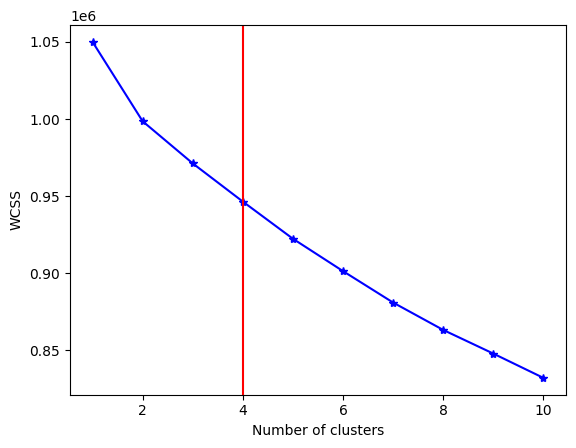

In [24]:
plt.plot(range(1, 11), wcss,"b*-")
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Observation**

As we can see that it is giving 4 as elbow point
let's also check silhouette_score


**Silhouette Score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 4 , Silhouette Score = 0.2869774221313428:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 5 , Silhouette Score = 0.27487334912061523:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 6 , Silhouette Score = 0.21471093332068072:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 7 , Silhouette Score = 0.26360703222324683:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 8 , Silhouette Score = 0.20488923425293426:


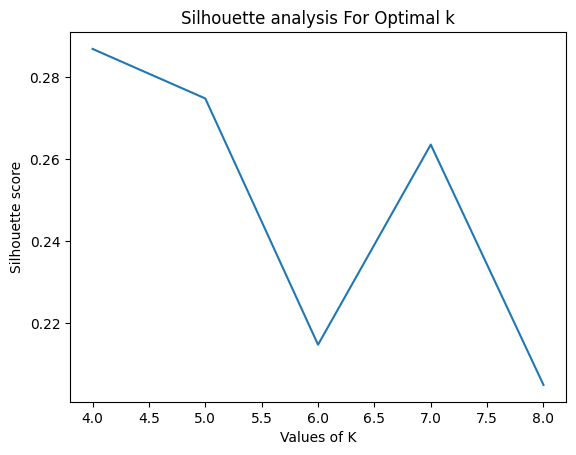

In [38]:
from sklearn.metrics import silhouette_score
# building k means model for k =4
range_n_clusters = [4,5,6,7,8]
silhouette = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(feature_scaled)

 silhouette_avg = silhouette_score(feature_scaled, kmeans.labels_)
 silhouette.append(silhouette_avg)
 print("For k = {} , Silhouette Score = {}:".format(num_clusters,silhouette_avg))

plt.plot(range_n_clusters,silhouette)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [39]:
# Building model for k=4
model=KMeans(n_clusters=4,random_state=42)
model.fit(feature_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
data['Cluster']=model.labels_
data.head()

,Female,Male,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [43]:
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([22807,  1266,   701,  5226]))

<ipython-input-48-d78fc78d8e21>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Cluster',palette=['#FF6347', '#4682B4', '#32CD32','#Cc9932'])


<Axes: xlabel='Cluster', ylabel='count'>

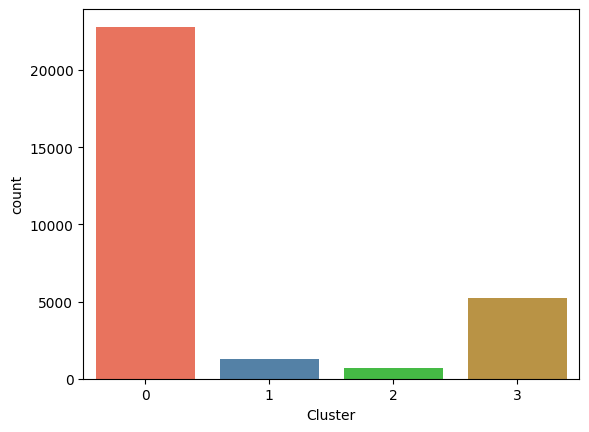

In [48]:
sns.countplot(data=data,x='Cluster',palette=['#FF6347', '#4682B4', '#32CD32','#Cc9932'])


**Observation**

Cluster 0 is highly dominant, suggesting a large proportion of the dataset shares similar characteristics.

Cluster 1 and Cluster 2 represent minor portions of the dataset, indicating less common characteristics.

Cluster 3 holds a moderate position, with a significant number of data points but not as dominant as Cluster 0.

In [49]:
# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

np.unique(model.labels_,return_counts=True)
silhouette = silhouette_score(feature_scaled, model.labels_)
db_index = davies_bouldin_score(feature_scaled, model.labels_)
ch_index = calinski_harabasz_score(feature_scaled, model.labels_)
# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.29
Davies-Bouldin Index: 3.39
Calinski-Harabasz Index: 1093.89


**Conclusion**

We have grouped the customers dataset into 4 clusters based on the brands they have searched on e-commerece sites. we have used the silhouette score method to find the optimum number of clusters and decided k=4 as the best pick after analysing the silhouette score .

After applying the K-means algorithms with an 4 number of clusters , we segmented the customers under 'Grocery','Appearls','Electronics'and 'Basket class' categories. These clusters give the information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers.